In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook',ticks=True, grid=False)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Attribute Information
    1) id: unique identifier
    2) gender: "Male", "Female" or "Other"
    3) age: age of the patient
    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    6) ever_married: "No" or "Yes"
    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    8) Residence_type: "Rural" or "Urban"
    9) avg_glucose_level: average glucose level in blood
    10) bmi: body mass index
    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
    12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# What is a Stroke?
    A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.
    
    A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

# What causes a Stroke?

    - Lifestyle risk factors:
        Being underweight, overweight or obese
        Physical inactivity
        Heavy or binge drinking
        Use of illegal drugs such as cocaine and methamphetamine
        
    - Medical risk factors
        High blood pressure
        Cigarette smoking or secondhand smoke exposure
        High cholesterol
        Diabetes
        Obstructive sleep apnea
        Cardiovascular disease, including heart failure, heart defects, heart infection or 
        abnormal heart rhythm
        Personal or family history of stroke, heart attack
        COVID-19 infection
        
    - Other factors associated with a higher risk of stroke include:
        Age — People age 55 or older have a higher risk of stroke than do younger people.
        Race — African Americans have a higher risk of stroke than do people of other races.
        Sex — Men have a higher risk of stroke than women. Women are usually older when 
        they have strokes, and they're more likely to die of strokes than are men.
        Hormones — Use of birth control pills or hormone therapies that include estrogen 
        increases risk.
        
Source : https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113#:~:text=There%20are%20two%20main%20causes,doesn't%20cause%20lasting%20symptoms.

In [3]:
eda = df.copy()

In [4]:
eda.drop('id', inplace = True, axis = 1)

In [5]:
eda.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
eda.rename(columns={"gender": "sex", "hypertension": "hbd", "heart_disease": "hd", "ever_married": "married",
                     "work_type": "worked", "Residence_type": "habitance", "avg_glucose_level": "glucose",
                     "smoking_status": "smoked"}, inplace = True)

Column Rename Definition :

    hbd = High Blood Pressure
    hd = Heart Disease

In [7]:
eda = eda[['sex','age','hbd','hd','married','worked','habitance','glucose','bmi','smoked',
          'stroke']] #rearrange the column order
eda

,sex,age,hbd,hd,married,worked,habitance,glucose,bmi,smoked,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Quick check for BMI(Body Mass Index)

According to the source :https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

    below 18.5 – you're in the underweight range
    between 18.5 and 24.9 – you're in the healthy weight range
    between 25 and 29.9 – you're in the overweight range
    between 30 and 39.9 – you're in the obese range 
    
Note : this BMI can only be applied on adults (20 years old and older), as for people below 20 years old, they have their own way on measuring their BMI.

In [8]:
len(eda[(eda['age'] >= 20) & ((eda['bmi'] < 18.5) | (eda['bmi'] >= 25))]), round(len(eda[(eda['age'] >= 20) & ((eda['bmi'] < 18.5) | (eda['bmi'] >= 25))])
                                                                                 /len(eda)*100, 2)

(3160, 61.84)

    There's 3160 people in the data that can be labeled as (under/overweight,obesity) which is around 
    61.84% of the sample. (There's more people who's under/over/obesity than normal weight people)

    For future readings and explanation, normal bmi will be labeled as data_a and underweight, overweight, and 
    obesity bmi will be labeled as data_b

In [9]:
data_a = eda[(eda['age'] >= 20) & ((eda['bmi'] >= 18.5) & (eda['bmi'] < 25))] # normal bmi
data_b = eda[(eda['age'] >= 20) & ((eda['bmi'] < 18.5) | (eda['bmi'] >= 25))] # underweight, overweight, obesity

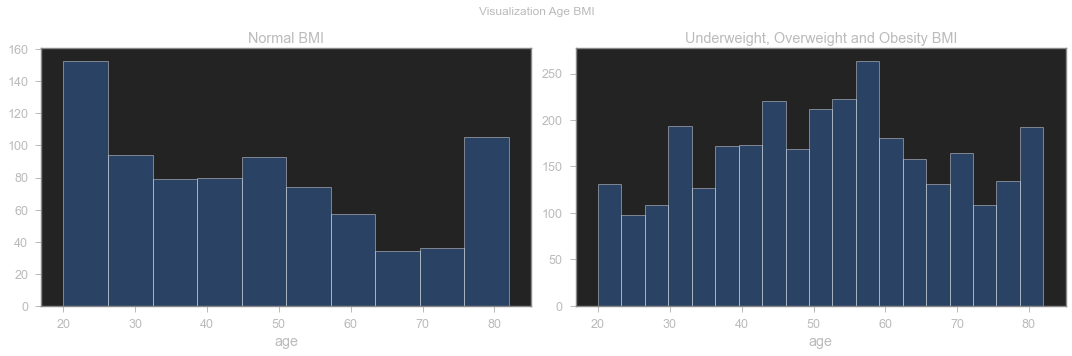

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Visualization Age BMI')
sns.distplot(data_a['age'], kde = False, ax = axes[0], hist_kws=dict(edgecolor="w", linewidth=1))
axes[0].set_title('Normal BMI')
sns.distplot(data_b['age'], kde = False, ax = axes[1], hist_kws=dict(edgecolor="w", linewidth=1))
axes[1].set_title('Underweight, Overweight and Obesity BMI')
fig.tight_layout()
plt.show()


I can conclude by looking at the graph that people are most found being underweight, overweight or obesity in the age of 50 to 60 years old. This statement is in line with this article https://www.cdc.gov/obesity/data/adult.html, where it says :
    
        The prevalence of obesity was 40.0% among adults aged 20 to 39 years, 44.8% among adults aged 40 to 59 years, and 42.8% among adults aged 60 and older.
        
Which explains why the top 4 bars is in between the age of 40 and 60

As for normal BMI, mostly are found in the age of 20 to 25 followed by age 75 above. This may be the case because those people just reach adulthood(20 - 25). As for the old people, there's an article written : 

    “Obesity incidence starts increasing in one’s twenties and peaks at 40 to 59, and then decreases 
    slightly after age 60,” says Craig Primack, MD, an obesity medicine physician at the Scottsdale 
    Weight Loss Center in Arizona.

# Why BMI? how's that supposed to with Stroke? 

    One of the cause of Stroke is underweight, overweight and obesity. Which is why I need split those data
    to be a much specific section which would be data_a and data_b


In [11]:
print('Percentage amount of normal bmi people with Stroke : ',round(data_a['stroke'].value_counts()[1]/len(eda['age'] >= 20)*100, 2))
print('Percentage amount of under/over/obesity bmi people with Stroke : ',round(data_b['stroke'].value_counts()[1]/len(eda['age'] >= 20)*100, 2))

Percentage amount of normal bmi people with Stroke :  0.68
Percentage amount of under/over/obesity bmi people with Stroke :  3.39


    This explains that data_b (people with underweight, overweight and obesity) has a bigger chance to prone to 
    getting a Stroke than data_a(normal bmi).

# Is there any relation between age and stroke?

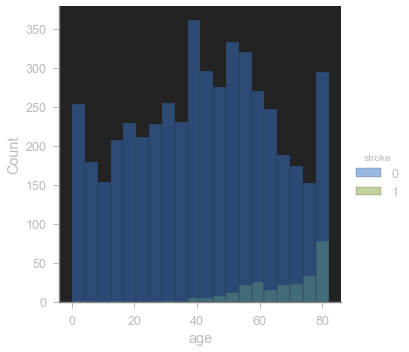

In [12]:
sns.displot(data = eda, x = eda['age'], hue = eda['stroke'])

Stroke occurs in all age groups.  Studies show the risk of stroke doubles for each decade between the ages of 55 and 85.  But strokes also can occur in childhood or adolescence.  Although stroke is often considered a disease of aging, the risk of stroke in childhood is actually highest during the perinatal period, which encompasses the last few months of fetal life and the first few weeks after birth.

Source : https://www.ninds.nih.gov/Disorders/Patient-Caregiver-Education/Preventing-Stroke#:~:text=Stroke%20occurs%20in%20all%20age,occur%20in%20childhood%20or%20adolescence.    
    
    As we can see, Stroke began to shows at the age of 40, which is earlier than what was told by the article 
    itself might proof that as time goes on, humans are more prone to Stroke in a much early age.

# BLOOD SUGAR TEST / AVG GLUCOSE LEVEL   
What's the relation between glucose level and Stroke? A high blood sugar could cause Diabetes which is one of the a risk factors for Stroke    
    
    Less than 100 mg/dL = normal
    Between 110–125 mg/dL = impaired fasting glucose (i.e., prediabetes)
    Greater than 126 mg/dL on two or more samples = diabetes

In [13]:
print('Stroke Percentage for people with normal blood pressure : ',round(eda[eda['glucose'] < 100]['stroke'].value_counts()[1]/ len(eda[eda['glucose'] < 100]['stroke'])*100, 2))
print('Stroke Percentage for people with diabestes : ',round(eda[eda['glucose'] > 126]['stroke'].value_counts()[1]/ len(eda[eda['glucose'] > 126]['stroke'])*100, 2))

Stroke Percentage for people with normal blood pressure :  3.58
Stroke Percentage for people with diabestes :  10.19


    
    People with Diabetest are prone to Stroke more than people with normal blood pressure

# High Blood Pressure towards Stroke

Stroke Percentage for people with High Blood Pressure(1) :  13.25
Stroke Percentage for people with Normal Blood Pressure(0) :  3.97


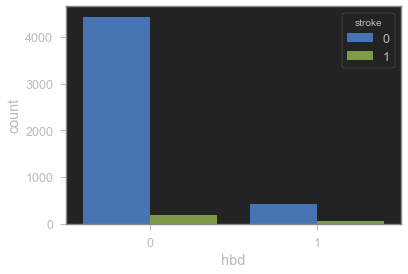

In [14]:
sns.countplot(data = eda, x = eda['hbd'], hue = eda['stroke'])
print('Stroke Percentage for people with High Blood Pressure(1) : ',round(eda[eda['hbd'] == 1]['stroke'].value_counts()[1]/ len(eda[eda['hbd'] == 1]['stroke'])*100, 2))
print('Stroke Percentage for people with Normal Blood Pressure(0) : ',round(eda[eda['hbd'] == 0]['stroke'].value_counts()[1]/ len(eda[eda['hbd'] == 0]['stroke'])*100, 2))

    
    This explain how more people with High Blood Pressure are more prone to getting Stroke than people who has 
    normal high blood pressure with a difference of 9.28%

Stroke Percentage for people that formerly smoked :  7.91
Stroke Percentage for people that never smoked :  4.76
Stroke Percentage for people that smokes :  5.32
Stroke Percentage for people that Unknown :  3.04


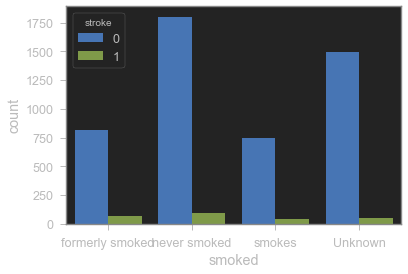

In [15]:
sns.countplot(data = eda, x = eda['smoked'], hue = eda['stroke'])
for i in eda['smoked'].unique():
    print(f'Stroke Percentage for people that {i} : ',round(eda[eda['smoked'] == f'{i}']['stroke'].value_counts()[1]/ len(eda[eda['smoked'] == f'{i}']['stroke'])*100, 2))

    
    People who smokes (either formerly or active), has a higher chance to get a Stroke. As for why the percent 
    difference between people smoke actively smokes and who doesn't is small, was because people who didn't 
    smoke might still have other factors like what was explained above, like overweight, high blood pressure, etc.
    But this won't deny the fact that people that smokes/d are prone to Stroke than who doesn't.

# RISK OF STROKE ACCORDING TO THEIR GENDER

In [16]:
for i in eda['sex'].unique()[0:2]:
    print(f'Stroke Percentage for people that {i} : ',round(eda[eda['sex'] == f'{i}']['stroke'].value_counts()[1]/ len(eda[eda['sex'] == f'{i}']['stroke'])*100, 2))

Stroke Percentage for people that Male :  5.11
Stroke Percentage for people that Female :  4.71


    
    The difference between male and female who has stroke wasn't that much of a difference, just by 0.4
    So Gender doesn't really affect much when it comes to getting a strokea according to the data.

# Does job status affects the chance of getting a Stroke?

Stroke Percentage for people that Private :  5.09
Stroke Percentage for people that Self-employed :  7.94
Stroke Percentage for people that Govt_job :  5.02
Stroke Percentage for people that children :  0.29


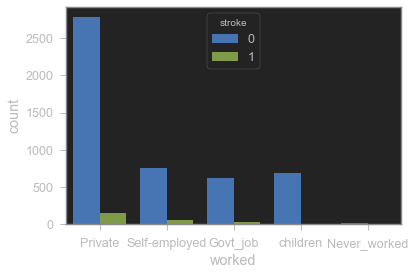

In [17]:
sns.countplot(data = eda, x = eda['worked'], hue = eda['stroke'])
for i in eda['worked'].unique()[0:4]:
    print(f'Stroke Percentage for people that {i} : ',round(eda[eda['worked'] == f'{i}']['stroke'].value_counts()[1]/ len(eda[eda['worked'] == f'{i}']['stroke'])*100, 2))

There's a quick note that I need to point out, that here we didn't see the 'never worked' section, that's because there's no stroke in that category.

    People who are self-employed are more prone to getting a Stroke rather than working a in private section or
    govt job and of course children. 
# BUT do working affects the risk of getting a Stroke?

    Well yes. According to BBC, Working long hours is linked to an increased risk of stroke.
    Long hours were defined in the French study as more than 10 hours on at least 50 days per year.
    People who did long hours for more than a decade were at the greatest risk of stroke, they suggest.
Source : https://news.gallup.com/poll/122510/self-employed-workers-clock-hours-week.aspx
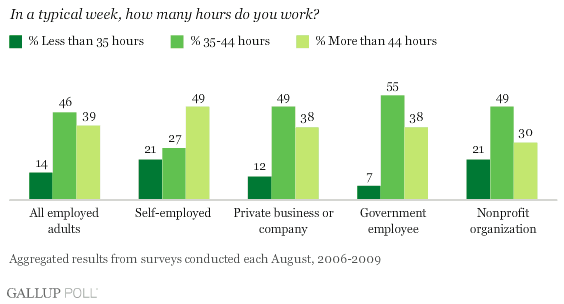

    Note : Hours by Week.
    
    Private and Goverment usually works more in between 35-44hours a week which could be calculated as 
    7-8 hours a day, as for self-employed are more often working above 44hours a week which would be
    9 hours above a day. Which explains why there's more self-employed people who's more prone to
    Stroke diseases than who work in a company or with government.

# Heart Disease towards Stroke

1 : With Heart Disease, 0 : No Heart Disease
Stroke Percentage for people that 1 :  17.03
Stroke Percentage for people that 0 :  4.18


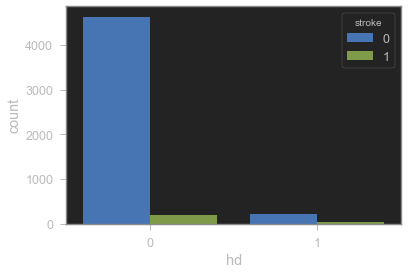

In [21]:
sns.countplot(data = eda, x = eda['hd'], hue = eda['stroke'])
print('1 : With Heart Disease, 0 : No Heart Disease')
for i in eda['hd'].unique():
    print(f'Stroke Percentage for people that {i} : ',round(eda[eda['hd'] == i]['stroke'].value_counts()[1]/ len(eda[eda['hd'] == i]['stroke'])*100, 2))

    
    People with heart disease hugely affects the chances of getting a stroke than people who has no history of having 
    a heart disease

# Does marriage affect the chance of getting a stroke?

Stroke Percentage for people that Yes :  6.56
Stroke Percentage for people that No :  1.65


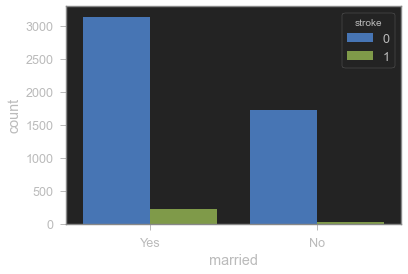

In [22]:
sns.countplot(data = eda, x = eda['married'], hue = eda['stroke'])
for i in eda['married'].unique():
    print(f'Stroke Percentage for people that {i} : ',round(eda[eda['married'] == f'{i}']['stroke'].value_counts()[1]/ len(eda[eda['married'] == f'{i}']['stroke'])*100, 2))


    According to the data, Yes it does affect more than people who's single. There's no research or articles
    yet that explained on how marriage could affect the chance of getting Stroke BUT if we are looking from the side
    of happiness, then yes, unhappy marriage does affect the chances of getting a stroke according to verywellhealth.
    
        "While divorce affects stroke incidence differently for men than it does women, an unhappy marriage also 
        affects men and women in different ways. An investigation from The University of Colorado at Boulder reported 
        that an unhappy marriage, identified as poor marital adjustment, resulted in a higher rate of development 
        of stroke risk factors for women, but not for men."
Source : https://www.verywellhealth.com/your-marriage-affects-your-chances-of-having-a-stroke-3145876#:~:text=Stroke%20Risk%20After%20Divorce&text=A%20stroke%20has%20a%20higher,for%20men%20than%20for%20women.

In [20]:
eda[(eda['married'] == 'Yes') & (eda['stroke'] == 1)]['sex'].value_counts()

Female    120
Male      100
Name: sex, dtype: int64

    There are more women that got stroke than men is because (not because of hormones) woman are prone to getting a stress and emotional breakdown than men which affect their body especially their heart which of course related to the chance of getting a heart disease.

# So what? To whom and why should people know about this?

    Stroke could cause Death but what's worse than death would be render you almost disable. It will affect someone's
    life as whole, not being able to do something or certain activities unlike when they were still healthy. 
    Of course this depends on what kind of stroke and how bad is it, but still even the lightest level of stroke
    will change someone's life completely, like movements and speech.
    
# Prevention
    So to prevent this stroke from happening, according to data, you have a lower chance of getting a Stroke if
    you doesn't smoke, try to work less hours for those who's self employed, maintain blood sugar levels and 
    body mass by eating much more healthy meals and healthy diet, and also having a healthy mindset because getting
    stress could affect your heart.